# Very good posts 

on data prepocessing
- https://www.jeremyjordan.me/preparing-data-for-a-machine-learning-model/

To read
- https://medium.com/@yaelg/product-manager-guide-part-3-developing-a-machine-learning-model-from-start-to-finish-c3e12fd835e4

On Recursive Feature elimination
- https://blog.datadive.net/selecting-good-features-part-iv-stability-selection-rfe-and-everything-side-by-side/

On GridSearchCV and RandomizedSearchCV
- https://www.ritchieng.com/machine-learning-efficiently-search-tuning-param/



#### Computer Vision

Transfer learning
 - https://towardsdatascience.com/transfer-learning-from-pre-trained-models-f2393f124751
 
 - https://www.analyticsvidhya.com/blog/2018/07/top-10-pretrained-models-get-started-deep-learning-part-1-computer-vision/
 
 - https://www.analyticsvidhya.com/blog/2018/03/comprehensive-collection-deep-learning-datasets/
 
 - https://www.analyticsvidhya.com/blog/2018/06/understanding-building-object-detection-model-python/
 
 - https://www.analyticsvidhya.com/blog/2016/10/tutorial-optimizing-neural-networks-using-keras-with-image-recognition-case-study/
 
 - https://www.analyticsvidhya.com/blog/2016/04/deep-learning-computer-vision-introduction-convolution-neural-networks/ (very good)
 

 - https://www.analyticsvidhya.com/blog/2016/10/an-introduction-to-implementing-neural-networks-using-tensorflow/
 
 
 
interview questions

 - https://www.reddit.com/r/computervision/comments/7gku4z/technical_interview_questions_in_cv/
 
 - https://www.quora.com/What-are-good-interview-questions-for-a-computer-vision-engineer
 
 - https://www.toptal.com/machine-learning/interview-questions
 
 - https://towardsdatascience.com/data-science-and-machine-learning-interview-questions-3f6207cf040b (good one)
 
 - https://www.wisdomjobs.com/e-university/image-processing-interview-questions.html
 
 - 
 
 
 
 
 
 
 
 
 
 

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import urllib.request
import warnings

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

#To ignore warnings, to display warning only once use 'once', 
#change it to 'default' to get everytime
warnings.filterwarnings('ignore') 

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
description_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names"

urllib.request.urlretrieve(data_url,"downloaded_raw_data.csv")
urllib.request.urlretrieve(description_url,"description.txt")

('description.txt', <http.client.HTTPMessage at 0x252ee8ae748>)

***To retrive data, I tried to use requests library like I usually do for webscraping but it is kind of long ;)*** 

On bit of googling found below information. Hence switched to urllib.request module as it is simple, elegant and sufficient

https://www.geeksforgeeks.org/downloading-files-web-using-python/

https://stackoverflow.com/questions/22676/how-do-i-download-a-file-over-http-using-python

For reference, using requests library code will be like below
```
import requests
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
response = requests.get(data_url)
content = response.content
with open("description.txt","wb") as desc:
    desc.write(response.content)
# for large datasets, as mentioned in above geeksforgeeks link, I might have to use stream and
# iter_content method so as to load in chucks

description_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names"
response = requests.get(data_url)
content = response.content
with open("downloaded_raw_data.csv","wb") as data:
    data.write(response.content)
    
```

Showing only required lines
    https://stackoverflow.com/questions/2081836/reading-specific-lines-only

In [3]:
with open("description.txt","r") as file:
    for i, line in enumerate(file):
        if i in range(108, 134):
            print(line)    

7. Attribute information



1) ID number

2) Diagnosis (M = malignant, B = benign)

3-32)



Ten real-valued features are computed for each cell nucleus:



	a) radius (mean of distances from center to points on the perimeter)

	b) texture (standard deviation of gray-scale values)

	c) perimeter

	d) area

	e) smoothness (local variation in radius lengths)

	f) compactness (perimeter^2 / area - 1.0)

	g) concavity (severity of concave portions of the contour)

	h) concave points (number of concave portions of the contour)

	i) symmetry 

	j) fractal dimension ("coastline approximation" - 1)



Several of the papers listed above contain detailed descriptions of

how these features are computed. 



The mean, standard error, and "worst" or largest (mean of the three

largest values) of these features were computed for each image,

resulting in 30 features.  For instance, field 3 is Mean Radius, field

13 is Radius SE, field 23 is Worst Radius.



From attribute information we can see that last 30 features are basically mean, SD and extreme(worst/largest) of 10 features.

We will create a list of column name with the info for our table

In [4]:
names = ['id', 'diagnosis'] # as the first 2 are already correct
raw = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 
       'compactness', 'concavity', 'c_points', 'symmetry', 'frac_dimen']
add = ['_mean', '_sd', '_worst']

for name in add:
    for feature in raw:
        names.append(feature+name)

In [5]:
print(len(names), names)

32 ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'c_points_mean', 'symmetry_mean', 'frac_dimen_mean', 'radius_sd', 'texture_sd', 'perimeter_sd', 'area_sd', 'smoothness_sd', 'compactness_sd', 'concavity_sd', 'c_points_sd', 'symmetry_sd', 'frac_dimen_sd', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'c_points_worst', 'symmetry_worst', 'frac_dimen_worst']


## We got the feature names and data ready

In [6]:
df = pd.read_csv('./downloaded_raw_data.csv', names = names)

In [7]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,c_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,c_points_worst,symmetry_worst,frac_dimen_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df.drop('id', axis = 1, inplace = True)

In [9]:
df.shape

(569, 31)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis            569 non-null object
radius_mean          569 non-null float64
texture_mean         569 non-null float64
perimeter_mean       569 non-null float64
area_mean            569 non-null float64
smoothness_mean      569 non-null float64
compactness_mean     569 non-null float64
concavity_mean       569 non-null float64
c_points_mean        569 non-null float64
symmetry_mean        569 non-null float64
frac_dimen_mean      569 non-null float64
radius_sd            569 non-null float64
texture_sd           569 non-null float64
perimeter_sd         569 non-null float64
area_sd              569 non-null float64
smoothness_sd        569 non-null float64
compactness_sd       569 non-null float64
concavity_sd         569 non-null float64
c_points_sd          569 non-null float64
symmetry_sd          569 non-null float64
frac_dimen_sd        569 non-null float64
radius_worst  

#### Preliminary Analysis
- 569 observations, 30 features (excluding target - **diagnosis**)
- no missing values found
- no objects found, apart from target to be classified

#### The above data conditions are enough to create and fit any model, so we will first try to get a baseline estimate before proceeding with data analysis and fitting data with kMeans model.

##### Creating a baseline model with Simple Linear Classifier (Logistic Regression)

In [11]:
X = df[names[2:]].values

In [12]:
df['diagnosis'].head(3) #Y

0    M
1    M
2    M
Name: diagnosis, dtype: object

Target(Y) is still categorical object, we have to convert it into numerical.

Using pandas get dummies to do one-hot encoding

In [13]:
pd.get_dummies(df['diagnosis']).head(2)

,B,M
0,0,1
1,0,1


#### As we are trying to detect the cancer, it is sufficient that we take only the column where the condition is Malignant i.e M

In [14]:
Y = pd.get_dummies(df['diagnosis'])['M'].values

In [15]:
print('Dimensions of X and Y : ', X.shape, Y.shape)

Dimensions of X and Y :  (569, 30) (569,)


In [ ]:
#converting Y to machine understandable language i.e numbers
# classes = list(Y_data.unique()) #get list of unique classes
# values = [1 if x=='M' else 0 for x in classes] # assign corresponding values for classes - similar to label encoding; 
    # for features i.e X we can use values = list(range(len(Y_data.unique())))
# print('Unique Classes : {}'.format(classes))
# print('Respective values assigned : {}'.format(values))


#### Our data is ready to go into model, for the purpose of validation we will split the data and proceed with fitting the data into model

In [16]:
seed = 2913
val_ratio = 0.3
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = val_ratio, random_state=seed)

baseline_classifier = LogisticRegression()
baseline_classifier.fit(X_train,Y_train)  #fitting the data
y_pred = baseline_classifier.predict(X_test)    #predecting with test cases

In [17]:
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy of basline classifer (rounded to 3 digits) : ",round(accuracy,3))

Accuracy of basline classifer (rounded to 3 digits) :  0.959



#### Baseline accuracy is around 96% which is decent, but as the model might be used to take a very important decision we can't accept that. Also checking confusion matrix to check about False postivies and False Negatives

In [18]:
confusion_matrix(Y_test,y_pred)

array([[107,   3],
       [  4,  57]], dtype=int64)

Making sense of confusion matrix

> true negatives is M00, false negatives is M10, true positives is M11 and false positives is M01.

We can use array.reshape(-1) or ravel(), I use flatten() as it is comprehendable

##### make sure the input order is same, if the order is reversed, values of fp and fn will be swapped.

In [19]:
tn, fp, fn, tp = confusion_matrix(Y_test,y_pred).flatten()
print ('tn, fp, fn, tp : ', (tn, fp, fn, tp))
print('Precision : ', precision_score(Y_test,y_pred))
print('Sensitivity/Recall(tp rate) : ', recall_score(Y_test,y_pred))

tn, fp, fn, tp :  (107, 3, 4, 57)
Precision :  0.95
Sensitivity/Recall(tp rate) :  0.9344262295081968


#### Our baseline can't be taken seriously everytime.

False negatives are 4 -> when the model predicted no, they actually do have the disease

Precision is 0.95, which implies when model predicts yes, only 95% of the time it is correct

From sensitivity, we can observere that when it's actually yes(Malignant), only ***93%*** times does the model predict yes

---

### As we have a baseline estimate we now do some data analysis and try to improve our predictions with kMeans as requested

### Checking if the data is skewed
- i.e if any of the class is under/over-represented

In [20]:
#checking if the dataframe is not modified
df.shape

(569, 31)

In [21]:
class_column = df['diagnosis']
classes, values = np.unique(class_column.values,return_counts=True)
for cls,val in zip(classes, values):
    print('{0} accounts for {1:.2f}% of total values'.format(cls, round(100*val/values.sum(),3)))
    print('No. of occurences {}\n'.format(val))

print('Total no. in class {}\n'.format(class_column.value_counts().sum()))


B accounts for 62.74% of total values
No. of occurences 357

M accounts for 37.26% of total values
No. of occurences 212

Total no. in class 569



#### we can observe that there are not much class imbalance in the data, we can proceed with our analysis
- If data is suffering from imbalance, we might have do upsampling or downsampling 

> above implementation for getting class percentage is inspired from below code which tries to display class percentanges

```
def print_dx_perc(data_frame, col):
    """Function used to print class distribution for our data set"""
    dx_vals = data_frame[col].value_counts()
    dx_vals = dx_vals.reset_index()
    # Create a function to output the percentage 
    f = lambda x, y: 100 * (x / sum(y))
    for i in range(0, len(dx_vals)):
        print('{0} accounts for {1:.2f}% of the class'\
              .format(dx_vals[i], f(dx_vals[col].iloc[i], 
                               dx_vals[col])))
print_dx_perc(df, 'column_name')
```

### Checking for outliers

We can check outliers using
- using pandas describe method to check for percentiles, standard deviation, mean and max 
    - I don't prefer as it takes time and I tend to miss outliers  (low accuracy for me)
- using Z-score
- using Interquartile range (IQR Score)

***We can also use visualizations (scatter plots/box plots) to check outliers***

Found below articles helpful
- https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
- https://medium.com/datadriveninvestor/finding-outliers-in-dataset-using-python-efc3fce6ce32

using Z score to find outliers
 - Z score is number of standard deviations by which the value of an observation or data point is above the mean value

> Formula for Z score = (Observation — Mean)/Standard Deviation

*We take some Z score and check if the given observation is inside the SD. If it is not we consider it as outlier*

In [22]:
z_score = 3
df_X = df[names[2:]]
outliers = df_X < df_X.mean() + z_score * df_X.std()

In [23]:
# Columns wise datapoints which are outside 3SD
df_X[outliers].isnull().sum().sort_values(ascending=False).head(15)

compactness_sd       12
symmetry_sd          11
compactness_worst    10
area_worst           10
frac_dimen_sd        10
frac_dimen_worst      9
symmetry_worst        9
compactness_mean      9
concavity_mean        9
texture_sd            9
area_mean             8
perimeter_sd          8
perimeter_mean        7
frac_dimen_mean       7
radius_sd             7
dtype: int64

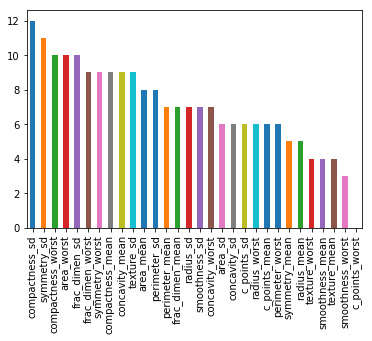

In [24]:
df_X[outliers].isnull().sum().sort_values(ascending=False).plot.bar() 

In [25]:
# top 10 rows where datapoints outside 3 S.D and the outliers count in each row
df_X[outliers].isnull().sum(axis=1).sort_values(ascending=False).head(10)

122    15
461    11
3       8
352     8
212     7
180     7
82      7
108     6
152     6
503     6
dtype: int64

In [26]:
df_X[outliers].isnull().sum().sum()

210

In [27]:
#using 4 Standard Deviations to check for outliers
z_score = 4
df_x = df[names[2:]]
outliers_4SD = df_X < df_X.mean() + z_score * df_X.std()

In [28]:
df_X[outliers_4SD].isnull().sum().sort_values(ascending=False).head(15)

symmetry_sd          5
smoothness_sd        4
area_sd              4
frac_dimen_mean      4
area_worst           4
texture_sd           4
frac_dimen_sd        4
compactness_sd       4
symmetry_worst       4
area_mean            3
concavity_mean       3
compactness_worst    3
perimeter_sd         3
c_points_sd          3
concavity_sd         3
dtype: int64

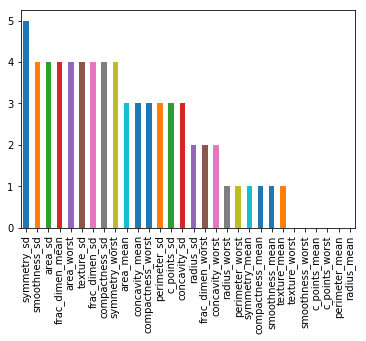

In [29]:
df_X[outliers_4SD].isnull().sum().sort_values(ascending=False).plot.bar()

In [30]:
df_X[outliers_4SD].isnull().sum(axis=1).sort_values(ascending=False).head(10)

461    7
152    5
122    4
3      4
212    4
12     3
78     3
213    2
180    2
190    2
dtype: int64

In [31]:
#Total outliers count
df_X[outliers_4SD].isnull().sum(axis=1).sum()

67

In [32]:
outliers_5SD = df_X < df_X.mean() + 5*df_X.std()
df_X[outliers_5SD].isnull().sum(axis=1).sum()

24

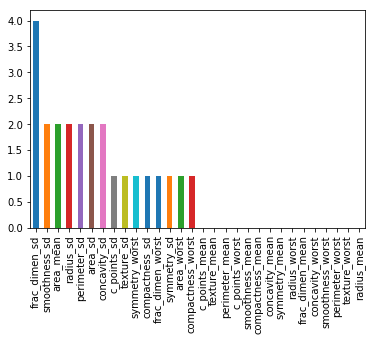

In [33]:
df_X[outliers_5SD].isnull().sum().sort_values(ascending=False).plot.bar()

We can see that there are many data points above usual 3SD distribution, 

### we can check the correlation of the columns on the target to know what is the effect of them on the model predection
> I'm considering top 15 columns from 3SD, for further correlation analysis 

Before we proceed with visual analysis, ***it is necessary to convert target to the appropriate representation to help with plots***

Here I'm using binary represenations using the map functionality in pandas. 

In [42]:
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

We can see that there are many datapoints which are 3 std deviations away from mean; many of them are inside 4 SD, we try to visualize them using scatter matrix

In [34]:
top_outliers = df_X[outliers].isnull().sum().sort_values(ascending=False).head(15)
outl_colnames = top_outliers.index.values.tolist()

#### Correlation Matrix

In [58]:
corr = df.corr(method='pearson')

In [77]:
corr[['diagnosis']+outl_colnames].iloc[0].sort_values(ascending=False)

diagnosis            1.000000
perimeter_mean       0.742636
area_worst           0.733825
area_mean            0.708984
concavity_mean       0.696360
compactness_mean     0.596534
compactness_worst    0.590998
radius_sd            0.567134
perimeter_sd         0.556141
symmetry_worst       0.416294
frac_dimen_worst     0.323872
compactness_sd       0.292999
frac_dimen_sd        0.077972
symmetry_sd         -0.006522
texture_sd          -0.008303
frac_dimen_mean     -0.012838
Name: diagnosis, dtype: float64

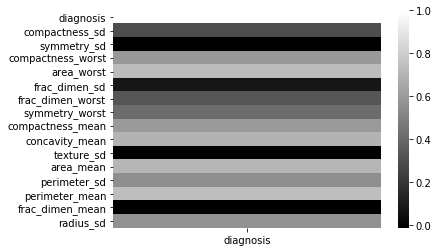

In [75]:
sns.heatmap(pd.DataFrame(corr[['diagnosis']+outl_colnames].iloc[0]),cmap='gray')

We can see that there 

#### Doing scatter plot analysis

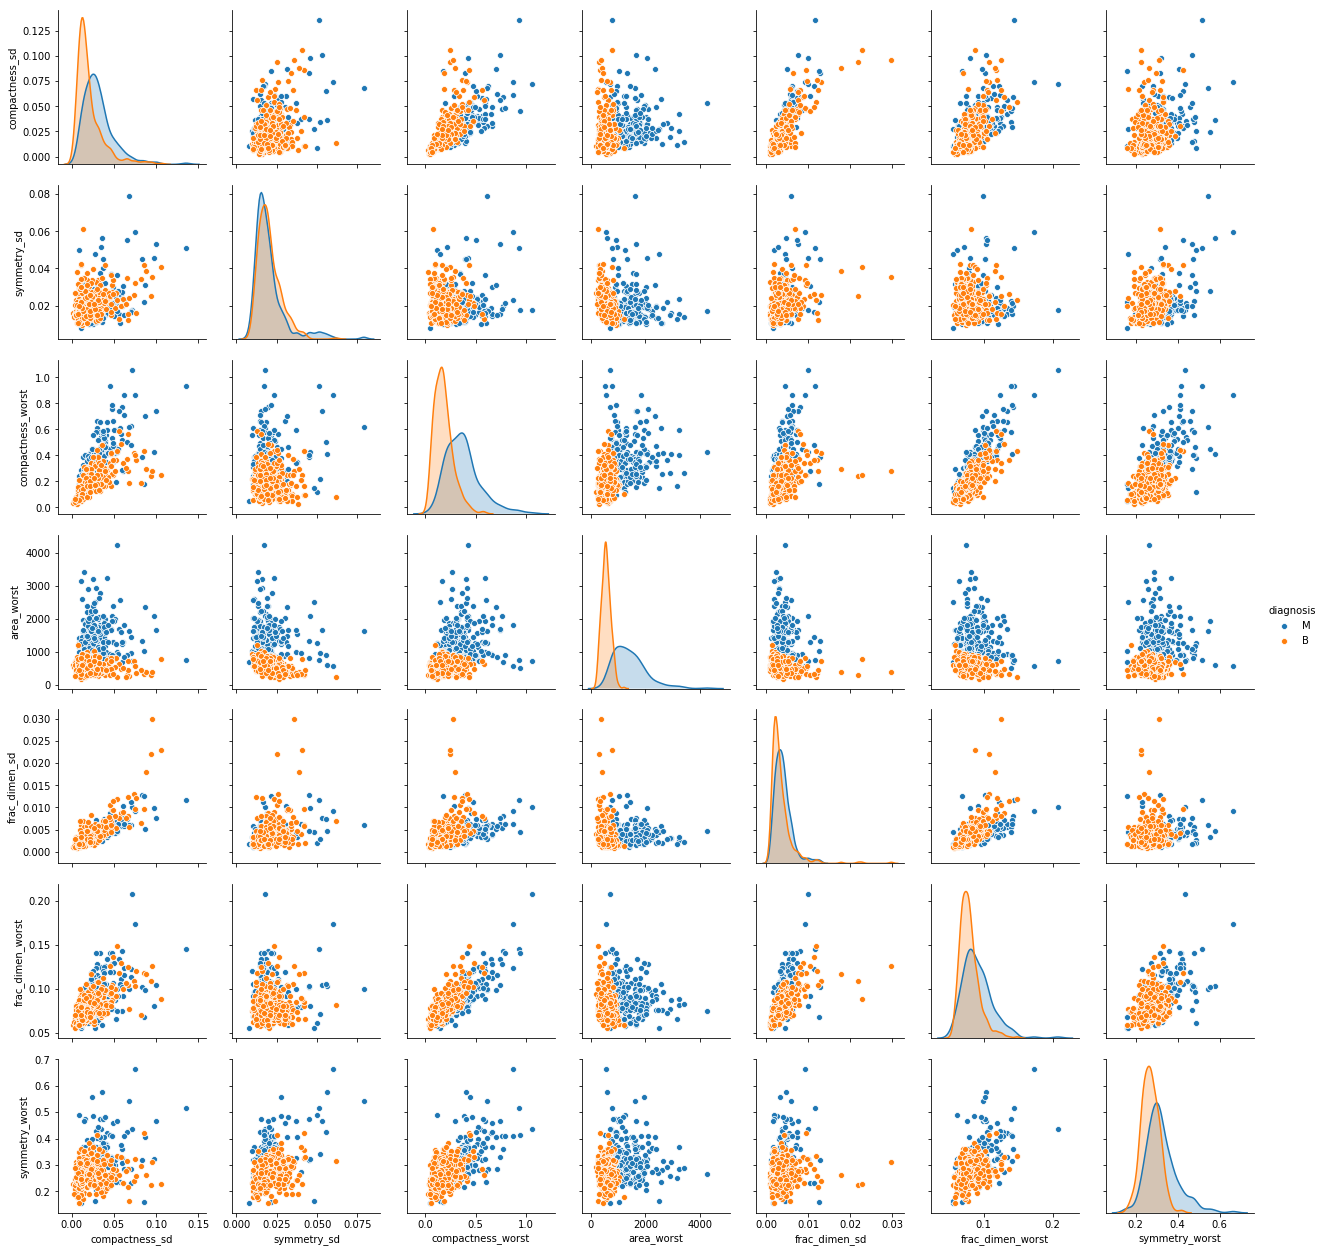

In [39]:
sns.pairplot(df,x_vars=outl_colnames[:7],y_vars=outl_colnames[:7],hue='diagnosis')

In [101]:
#using Z score of 3
df[df[columns[2:]] < df[columns[2:]].mean() + 3 * df[columns[2:]].std()].isnull().sum().sum()

593

In [87]:
precision_score?

In [253]:
abc = 1,'000asdf','000asdf'
print(abc)

(1, '000asdf', '000asdf')


In [251]:
print((a,b,c))

NameError: name 'a' is not defined

In [254]:
sum([1,3,5])

9

In [256]:
'asf'[::-1]

'fsa'